In [687]:
# Date: 2023-09-26
# Author: Muhammad Hammad Khokhar
# Version: 0.1

# **Investigative Analysis of Aviation Accidents**

# **Table of Contents**

1. [Introduction](#introduction)
2. [Questions](#questions)
3. [Pipeline](#3-pipeline)
    - [Import Libraries](#import-libraries)
    - [Import Dataset](#load-data)
    - [Columns Explained](#columns-explained)
    - [Data Exploration](#data-exploration)
    - [Conclusion](#conclusion)

# **1. Introduction**

> In this aviation accidents exploratory data analysis pipeline, we will explore the the impact of these accidents, and what are the costs in terms of loss of life and economic impact to the airports and airlines. We will also look in depth regarding the cause and factors.

# **2. Questions**


> 1. Which cities airports in Germany are most vulnerable to aviation accidents?
> 2. What are the trends in aviation accidents in terms of injury (e.g., fatal, serious, minor, uninjured)?
> 3. What are the common factors leading to severe aircraft damage?
> 4. Which aircrafts caused most accidents, based on model, make, and engine?
> 5. Which weather caused most accidents and which aircrafts failed?



# **3. Pipeline**

## Import Libraries

Importing the necessary libraries for the project. 

In [688]:
import pandas as pd # To read csv files
import matplotlib.pyplot as plt # To plot our data
import seaborn as sns # To plot our data
import numpy as np # To perform mathematical operations
import plotly.express as px # To plot our data
import asyncio # To perform asynchronous operations

## Import Dataset

Below we import the dataset and list the first 5 rows of the dataset.

In [689]:
# read the dataset
df = pd.read_csv('./datasets/AviationData.csv', encoding='ISO-8859-1', low_memory=False)

# show the shape of the dataset (rows, columns)
rows_and_cols = df.shape 
print(f"Total Rows: {rows_and_cols[0]}", f"Total Columns: {rows_and_cols[1]}", sep='\n')

# Add a line separator
print("-" * 50)

# Show the first 5 rows of the dataset
df.head()

Total Rows: 88889
Total Columns: 31
--------------------------------------------------


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Columns Explained

Definition of the columns of the dataset.

| **Column Name**          | **Definition**                                                                                            |
|----------------------|--------------------------------------------------------------------------------------------------------|
| Event.Id             | Unique identifier for the event                                                          |
| Investigation.Type   | Type of investigation                                                          |
| Accident.Number      | A unique identifier for the accident                                                              |
| Event.Date           | Date when the event occurred                                                                  |
| Location             | Location where the event occurred                                                              |
| Country              | The country in which the event took place                                                             |
| Latitude             | Latitude coordinate of the location                                                             |
| Longitude            | Longitude coordinate of the location                                                          |
| Airport.Code         | Code of the airport                                                           |
| Airport.Name         | Name of the airport                                                               |
| Injury.Severity      | The severity of injuries                                                    |
| Aircraft.damage      | Type of damage                                                              |
| Aircraft.Category    | Category of aircraft (e.g., Plane, Helicopter, etc.)                  |
| Registration.Number  | Aircraft registration number                                                                           |
| Make                 | The manufacturer of the aircraft                                                                       |
| Model                | The model of the aircraft                                                                              |
| Amateur.Built        | Indicates whether the aircraft was amateur-built                                                         |
| Number.of.Engines    | The number of engine                                                              |
| Engine.Type          | Type of engine                                                                |
| FAR.Description      | Description of Federal Aviation Regulations (FAR) applied                                  |
| Schedule             | Information about the flight schedule                                                                   |
| Purpose.of.flight    | The purpose or type of flight                        |
| Air.carrier          | The name of the air carrier or airline                                          |
| Total.Fatal.Injuries | The total number of fatal injuries                                    |
| Total.Serious.Injuries| The total number of serious injuries                               |
| Total.Minor.Injuries | The total number of minor injuries                             |
| Total.Uninjured      | The total number of individuals who were uninjured                              |
| Weather.Condition    | The weather condition       |
| Broad.phase.of.flight| The phase of flight                |
| Report.Status        | The status of the investigation report                                         |
| Publication.Date     | The date when the investigation report was published or made available                                 |

## Data Exploration & Processing

In this section we explore the data, analyse to identify any anomalies in the data and answer the questions.

We start by first investigating the data to learn about missing values

In [690]:
# Statistical summary of the numerical columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [691]:
# Check for missing values (%)
nullValues = df.isnull().sum() / df.shape[0] * 100

# Sort the values by column with highest missing values
nullValues.sort_values(ascending=False)

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.469946
Airport.Name              40.611324
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.961615
Report.Status              7.178616
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.481623
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Investigation.Type         0

It appears that a lot of values are missing for the following columns:
- Schedule             
- Air.carrier          
- FAR.Description      
- Aircraft.Category    
- Longitude            
- Latitude             
- Airport.Code         
- Airport.Name         
- Broad.phase.of.flight

In [692]:
# Getting accidents data from 2012 to 2022
df = df[df["Event.Date"].str.contains("2012|2013|2014|2015|2016|2017|2018|2019|2020|2021|2022")]

# Get countries to plot on the map
countries = df["Country"]

# We add a coulumn 'Number of Accidents' by counting the countries
countries = countries.value_counts().rename_axis('Country').reset_index(name='Number of Accidents')

# Color scale with a unique color for each country
colorScale = px.colors.qualitative.Set1[:len(countries)]

# Hyperparameters for the choropleth map
choroplethParms = {
    'locations': 'Country',
    'locationmode': 'country names',
    'color': 'Country',
    'hover_name': 'Country',
    'hover_data': ['Number of Accidents'],
    'color_discrete_sequence': colorScale,
    'title': 'Number of Accidents by Country (2012-2022)'
}

# Creation of world map with hover data to show number of accidents for each country
fig = px.choropleth(countries, **choroplethParms)

# Show the map
fig.show()

Now we have explored the worldwide accidents, we will explore accidents which occured in Germany to find out which cities were most vulnerable to accidents and what kind of damage was caused.

# 1. Which cities airports in Germany are most vulnerable to accidents?
We will now see which cities were most vulnerable to accidents in Germany.

In [693]:
# We will explore Germany's accidents
germanyAccidents = df[df["Country"] == "Germany"]
print(f"{germanyAccidents.shape[0]} accidents happened in Germany from 2012 to 2022")

96 accidents happened in Germany from 2012 to 2022


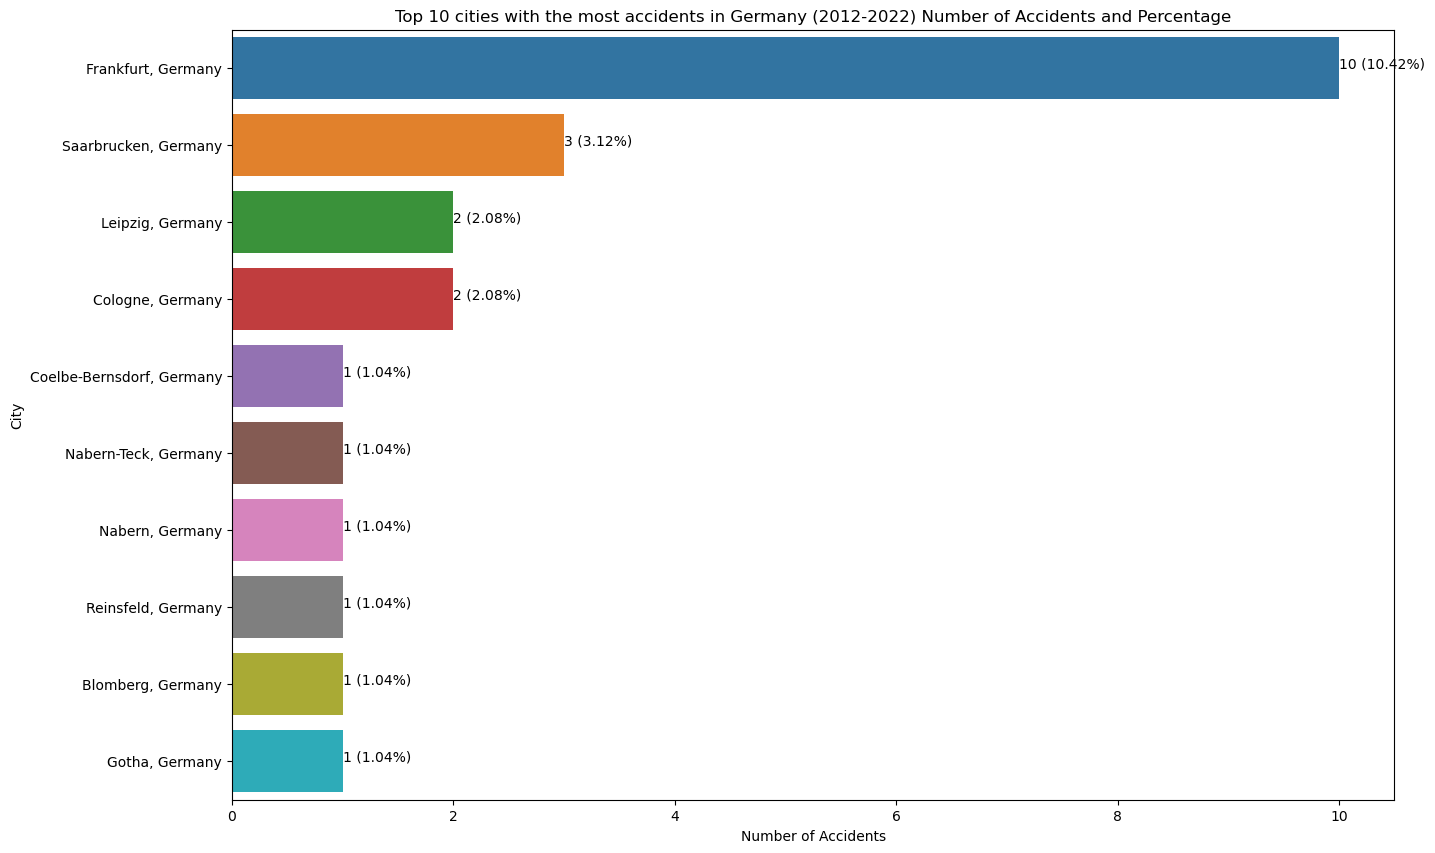

In [694]:
# We get the top ten cities with the most accidents
topTenCitiesWithCountOfAccidents = germanyAccidents["Location"].value_counts().iloc[:10]

# We plot the airports with number and percentage of accidents
plt.figure(figsize=(15, 10))
sns.countplot(y=germanyAccidents["Location"], order=topTenCitiesWithCountOfAccidents.index)
plt.title("Top 10 cities with the most accidents in Germany (2012-2022) Number of Accidents and Percentage")
plt.xlabel("Number of Accidents")
for i, v in enumerate(topTenCitiesWithCountOfAccidents.values):
    plt.text(v, i, str(v) + " (" + str(round(v / germanyAccidents.shape[0] * 100, 2)) + "%)")
plt.ylabel("City")
plt.show()

Frankfurt am Main appears to be most vulnerable to accidents with total number of 10 accidents, a percentage of 10.42% of the total accidents in Germany airports. Followed by Saarbrucken with 3 accidents and a percentage of 3.12%. These airports require more attention to prevent accidents.

# 2. What are the trends in accidents in terms of injury (e.g., fatal, serious, minor, uninjured)?

In this section we see the trends and understand the severity of the accidents injuries by location.

In [695]:
# We get the injuries by their type and calculate the percentage
injuryByTheirType = germanyAccidents.groupby('Injury.Severity').agg({
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}, axis="columns").apply(lambda x:100 * x / float(x.sum())).round(2)

# We plot the injuries
injuryByTheirType


,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Injury.Severity,,,
Fatal,0.0,7.69,0.07
Non-Fatal,100.0,92.31,99.93


We see that 100% of serious injuries were non-fatal. Minor injuries were 7.69% fatal and 92.31% non-fatal. 99.93% of people were uninjured during these incidents where 0.07 had some sort of injury which is not clear in the data.

# 3. What are the common factors leading to severe aircraft damage ?

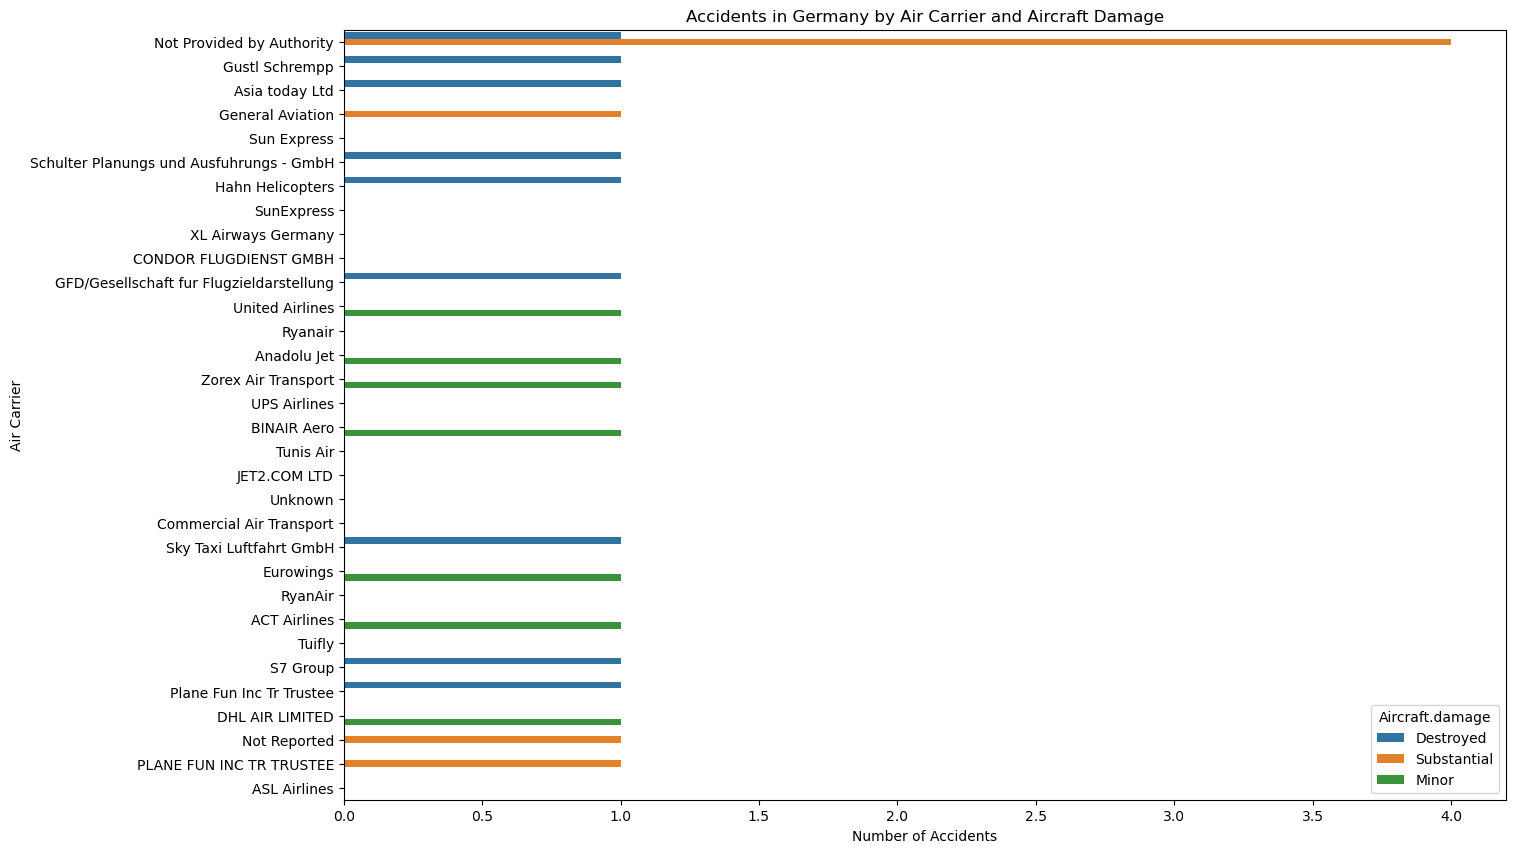

In [696]:
# Which aircrafts caused most accidents, based on model, make, and engine?
plt.figure(figsize=(15, 10))
sns.countplot(y=germanyAccidents["Air.carrier"], hue=germanyAccidents["Aircraft.damage"])
plt.title("Accidents in Germany by Air Carrier and Aircraft Damage")
plt.xlabel("Number of Accidents")
plt.ylabel("Air Carrier")
plt.show()

We see above type of damage caused by air carrier by number of accidents. Where susbstancial damage is the most common damage caused.

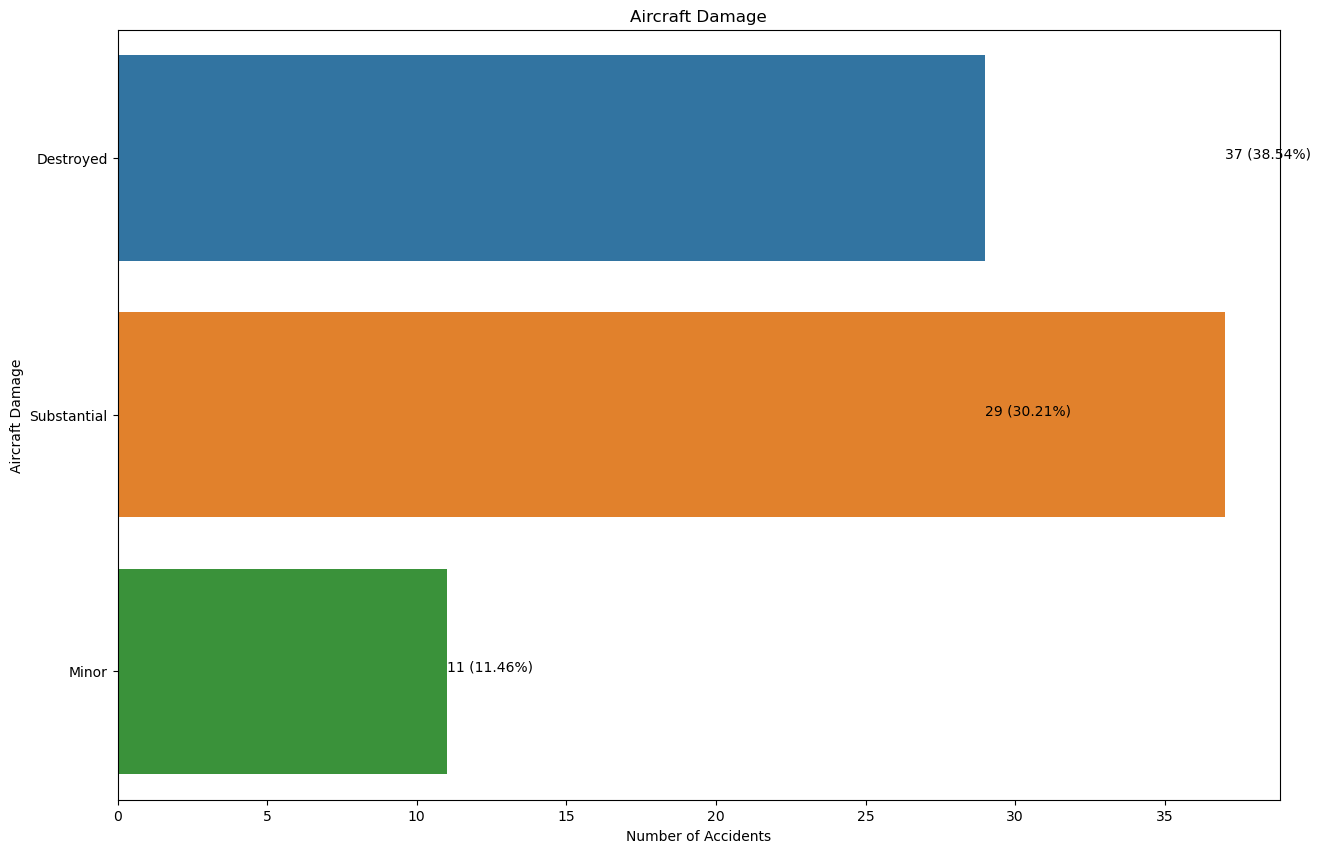

In [697]:
# Plot for aircraft damage
plt.figure(figsize=(15, 10))
sns.countplot(y=germanyAccidents["Aircraft.damage"])
plt.title("Aircraft Damage")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Damage")
for index, damage in enumerate(germanyAccidents["Aircraft.damage"].value_counts().values):
    plt.text(damage, index, str(damage) + " (" + str(round(damage / germanyAccidents.shape[0] * 100, 2)) + "%)")
plt.show()

Data processing can be done here to exculde null results. Apart from that, it is clear that substantial damage was common damage among the accidents. Minor damage appears to second common followed by destroyed and then unknown. Unknown damage refers to data which was not available.

Note: Figure 2 also include accidents where aircraft information was not available.

In [698]:
# We get numbers of accidents by aircraft make
germanyAccidents["Make"].value_counts().iloc[:10]

BOEING        23
CESSNA        17
PIPER         11
ROBINSON       4
BEECH          4
HUGHES         3
BELL           2
SWEARINGEN     2
MOONEY         2
CIRRUS         2
Name: Make, dtype: int64

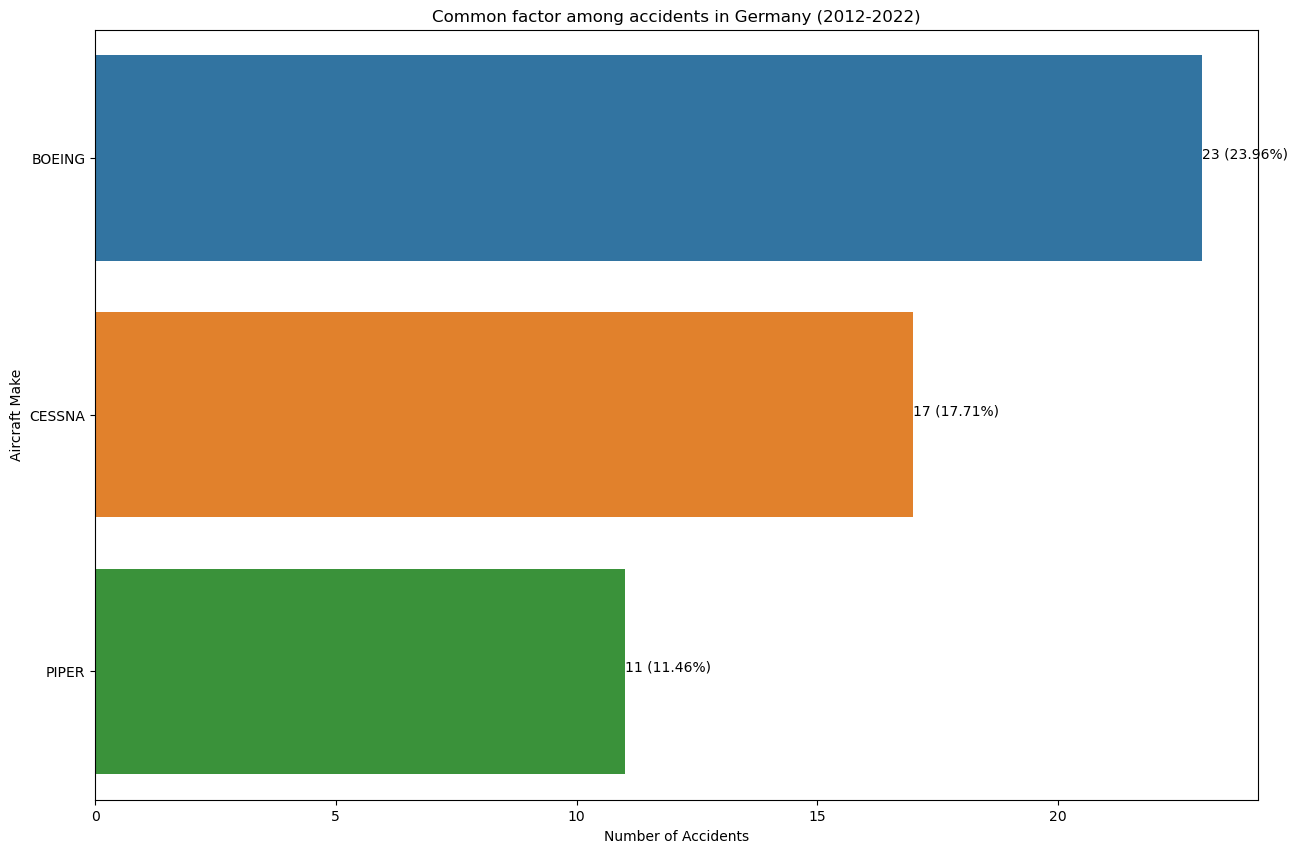

In [709]:
# We get top 3 aircrafts make with most accidents
topThreeAircrafts = germanyAccidents["Make"].value_counts().iloc[:3]

# Plot for aircraft damage
plt.figure(figsize=(15, 10))
sns.countplot(y=germanyAccidents["Make"], order=topThreeAircrafts.index)
plt.title("Common factor among accidents in Germany (2012-2022)")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Make")
for index, damage in enumerate(topThreeAircrafts.values):
    plt.text(damage, index, str(damage) + " (" + str(round(damage / germanyAccidents.shape[0] * 100, 2)) + "%)")
plt.show()

Most common factor is the make model of the aircrafts, most of the accident were caused by Boeing aircrafts. Followed by Cessna and Piper.

# 4. Which aircrafts caused most accidents, based on model, make, and engine?

We will pick top 3 aircraft to see which caused most accidents. Its notable that not every information is available for every aircraft for that reason data will be limited to where all the information is available to analyse and compare.

In [764]:
# summary based on different factors
specsBasedAccidents = germanyAccidents.fillna("Unknown").groupby("Make")[["Make", "Model", "Engine.Type", "Injury.Severity", "Purpose.of.flight"]].head().value_counts().iloc[:10]
specsBasedAccidents

Make                        Model         Engine.Type    Injury.Severity  Purpose.of.flight
BOEING                      737           Unknown        Non-Fatal        Unknown              2
AVID                        MARK IV       Reciprocating  Fatal            Unknown              1
RAVEN AIRCRAFT CORPPRATION  RAVEN         Unknown        Fatal            Unknown              1
MOONEY                      M20E          Unknown        Fatal            Unknown              1
                            M20M          Unknown        Non-Fatal        Unknown              1
MOONEY AIRCRAFT CORP.       M20K          Reciprocating  Fatal            Personal             1
PIPER                       PA-28RT-201T  Unknown        Fatal            Unknown              1
                            PA-32T        Reciprocating  Fatal            Unknown              1
                            PA-34         Unknown        Fatal            Unknown              1
                            PA-39  

Above is the summary of what we will see below in detail analysis where we will compare different factors to better understand the accidents. We see that Boeing tops again in compared to different variables, such as model, engine, injury serverity tops with 2 accidents. Reason for showing 2 is that the infromation is not available with every accident for model etc.

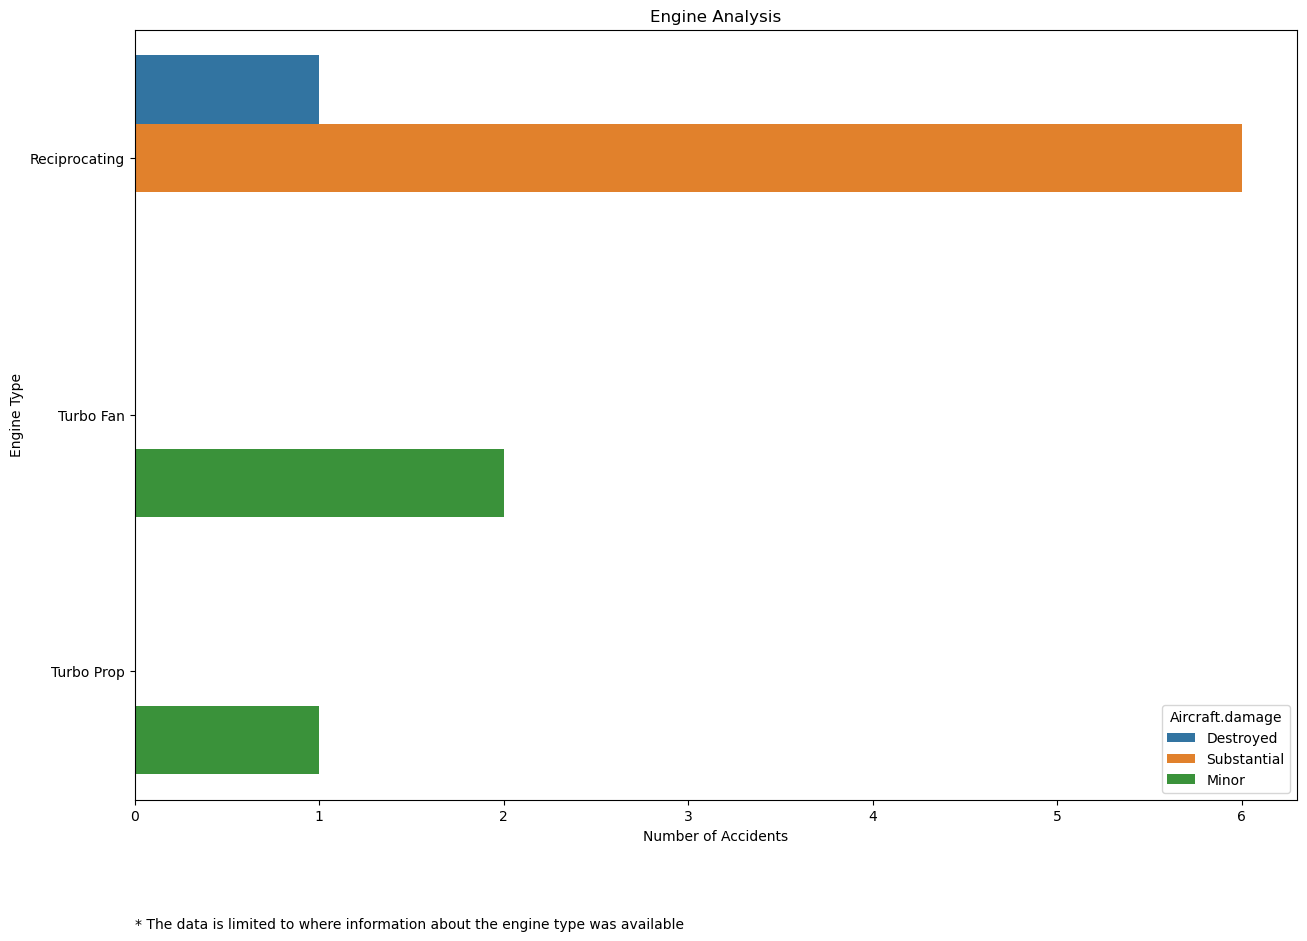

In [816]:
# Engine and damage analysis plot
plt.figure(figsize=(15, 10))
sns.countplot(y=germanyAccidents["Engine.Type"], hue=germanyAccidents["Aircraft.damage"])
plt.title("Engine Analysis")
plt.xlabel("Number of Accidents")
plt.ylabel("Engine Type")
plt.text(0, 3, "* The data is limited to where information about the engine type was available")
plt.show()

Reciprocating engine was the only engine where aircraft was destroyed and other was substantial damage that was caused during six accidents. Turbo Fan only had two minor accidents. Turbo Prop was involved in only one accident.

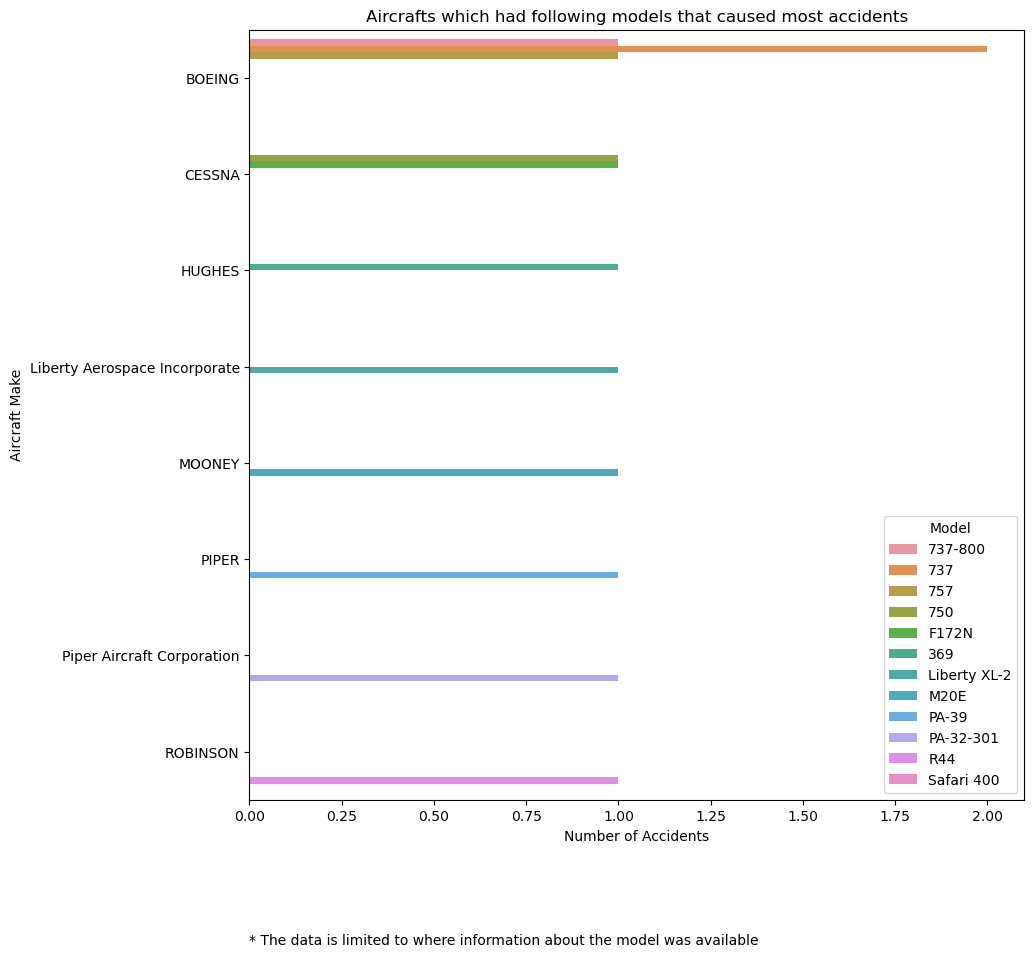

In [821]:
# We get limited records to 15 and sort them by make to avoid cluttering
limitAccidentsByMake = germanyAccidents.head(15).sort_values(by="Make")

# Create the countplot using the limited DataFrame
plt.figure(figsize=(10, 10))
sns.countplot(y=limitAccidentsByMake["Make"], hue=limitAccidentsByMake["Model"])
plt.title("Aircrafts which had following models that caused most accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Make")
plt.text(0, 9, "* The data is limited to where information about the model was available")
plt.show()

As we have witnessed above, Boeing was the most common aircraft involved in accidents. Model 737-800 and 757 were used by Boeing in these accidents. Aircraft 737 caused most accidents. Boeing and Cessna both used same 757 which were involved in accident as well.

# 5. Which weather caused most accidents and which aircrafts failed?

As we discuss about the weather there are few forms in aviation industry to remember what they stands for; VMC - Visual Meteorological Conditions, IMC - Instrument Meteorological Conditions, and "Unk" - Unknown.

In [846]:
summaryOfModelByWeather = germanyAccidents.groupby('Weather.Condition')[["Model", "Make"]].value_counts().iloc[:10]
summaryOfModelByWeather.head(10)

Weather.Condition  Model      Make                      
IMC                R44 - II   ROBINSON                      1
Unk                390        RAYTHEON                      1
                   MARK IV    AVID                          1
VMC                35 - A     LEARJET                       1
                   369        HUGHES                        1
                   PA-32-301  Piper Aircraft Corporation    1
                   R44        ROBINSON                      1
                   SA227      SWEARINGEN                    1
dtype: int64

We see that based on available data where both model and make are available; IMC: where visual was not clear and flight was opposed to operate that caused accident one accident, VMC: where flight was permitted to operate and the vision was clear that caused five accidents for mentioned models. Unk: where weather information was not available that caused two accidents.

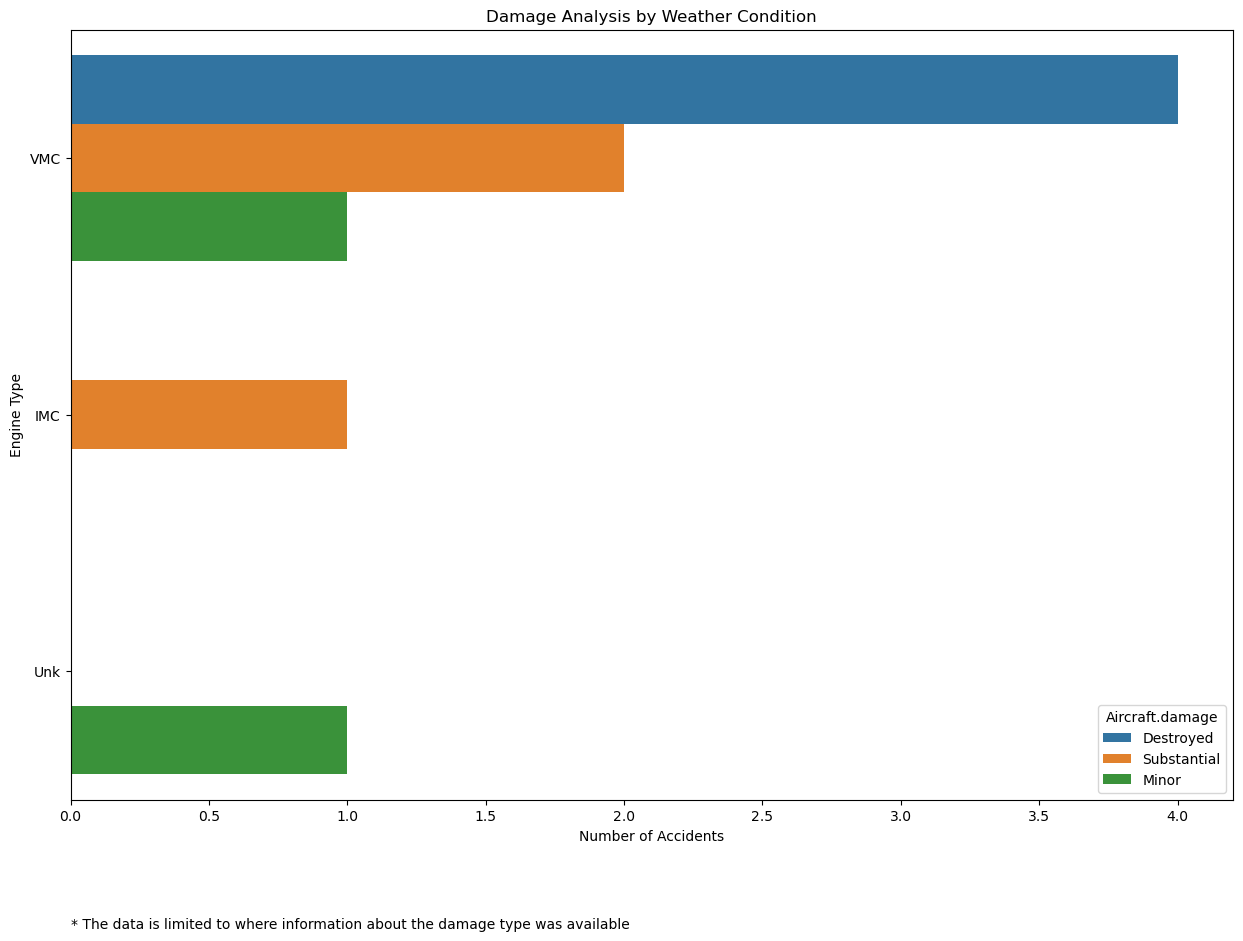

In [853]:
# Weather and damage analysis
plt.figure(figsize=(15, 10))
sns.countplot(y=germanyAccidents["Weather.Condition"], hue=germanyAccidents["Aircraft.damage"])
plt.title("Damage Analysis by Weather Condition")
plt.xlabel("Number of Accidents")
plt.ylabel("Engine Type")
plt.text(0, 3, "* The data is limited to where information about the damage type was available")
plt.show()

Most of the time visuals were clear and flight was permitted to operate. There are highest number of accidents even though the weather was clear and at least as good as minimum requirements.

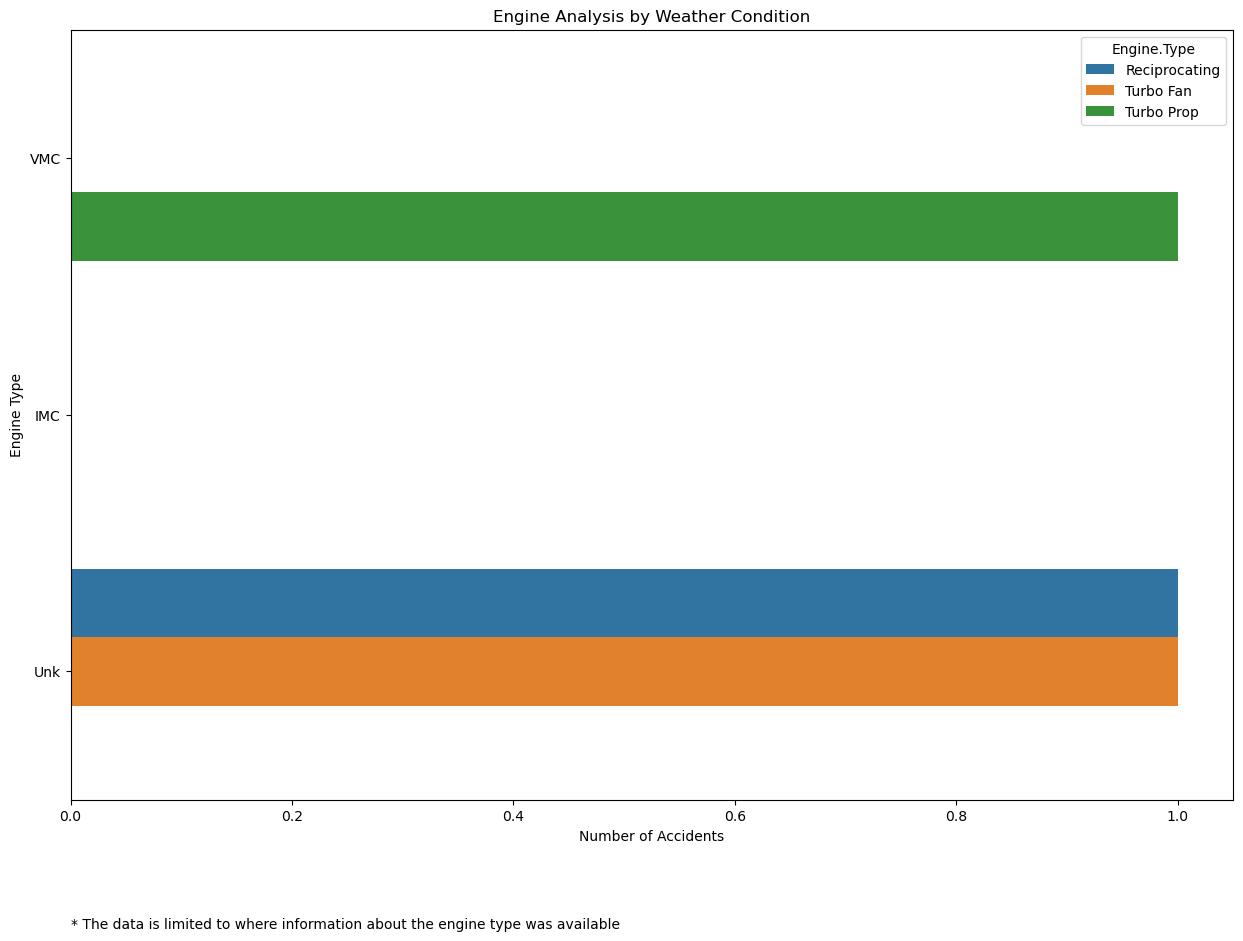

In [852]:
# Weather and engine analysis
plt.figure(figsize=(15, 10))
sns.countplot(y=germanyAccidents["Weather.Condition"], hue=germanyAccidents["Engine.Type"])
plt.title("Engine Analysis by Weather Condition")
plt.xlabel("Number of Accidents")
plt.ylabel("Engine Type")
plt.text(0, 3, "* The data is limited to where information about the engine type was available")
plt.show()

Turbo Prop was the only engine where weather visualuals were clear but still it caused accident. Information on Turbo Fan and Reciprocating is not available.

# Conclusion